
# **CORONARY HEART DISEASE PREDICTION WITH IMBALANCED DATA**


In [ ]:
import numpy as np
import copy
import tensorflow as tf
from sklearn import preprocessing
from tensorflow import keras
import os
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import seed
np.random.seed(1)

In [ ]:
df=pd.read_csv("C:/Users/neera/Downloads/CardiacPrediction - CoroHeartDis.csv")
df.columns

Index(['SEQN', 'Gender', 'Age', 'Annual-Family-Income',
       'Ratio-Family-Income-Poverty', 'X60-sec-pulse', 'Systolic', 'Diastolic',
       'Weight', 'Height', 'Body-Mass-Index', 'White-Blood-Cells',
       'Lymphocyte', 'Monocyte', 'Eosinophils', 'Basophils', 'Red-Blood-Cells',
       'Hemoglobin', 'Mean-Cell-Vol', 'Mean-Cell-Hgb-Conc.',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Segmented-Neutrophils', 'Hematocrit', 'Red-Cell-Distribution-Width',
       'Albumin', 'ALP', 'AST', 'ALT', 'Cholesterol', 'Creatinine', 'Glucose',
       'GGT', 'Iron', 'LDH', 'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid',
       'Triglycerides', 'Total-Cholesterol', 'HDL', 'Glycohemoglobin',
       'Vigorous-work', 'Moderate-work', 'Health-Insurance', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke', 'CoronaryHeartDisease'],
      dtype='object')

In [ ]:
df.head(5)

,SEQN,Gender,Age,Annual-Family-Income,Ratio-Family-Income-Poverty,X60-sec-pulse,Systolic,Diastolic,Weight,Height,...,Total-Cholesterol,HDL,Glycohemoglobin,Vigorous-work,Moderate-work,Health-Insurance,Diabetes,Blood-Rel-Diabetes,Blood-Rel-Stroke,CoronaryHeartDisease
0,2,1,77,8,5.00,68,98,56,75.4,174.0,...,5.56,1.39,4.7,3,3,1,2,2,2,0
1,5,1,49,11,5.00,66,122,83,92.5,178.3,...,7.21,1.08,5.5,1,1,1,2,2,2,0
2,12,1,37,11,4.93,64,174,99,99.2,180.0,...,4.03,0.98,5.2,2,1,1,2,1,1,0
3,13,1,70,3,1.07,102,130,66,63.6,157.7,...,8.12,1.28,7.6,3,3,1,1,1,2,0
4,14,1,81,5,2.67,72,136,61,75.5,166.2,...,4.50,1.04,5.8,1,1,1,2,2,2,0


<AxesSubplot:>

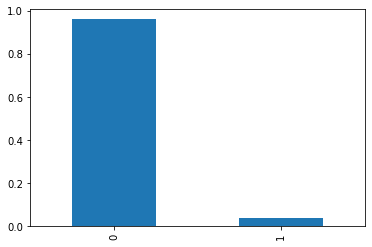

In [ ]:
df['CoronaryHeartDisease'].value_counts(normalize='False').plot(kind='bar')

In [ ]:
#drop irrelavent variables
df.drop(['SEQN','Annual-Family-Income','Height','Ratio-Family-Income-Poverty','X60-sec-pulse',
          'Health-Insurance','Lymphocyte','Monocyte','Eosinophils','Total-Cholesterol','Mean-Cell-Vol','Mean-Cell-Hgb-Conc.','Hematocrit','Segmented-Neutrophils'],axis=1,inplace=True)

df.shape

(37079, 37)

In [ ]:
df=pd.get_dummies(df,columns=['Gender','Vigorous-work', 'Moderate-work', 'Diabetes',
       'Blood-Rel-Diabetes', 'Blood-Rel-Stroke'])

In [ ]:
frame=df.copy()
frame.drop('CoronaryHeartDisease',axis=1,inplace=True)
var=np.array(frame.columns)
frame=np.array(frame)
var

array(['Age', 'Systolic', 'Diastolic', 'Weight', 'Body-Mass-Index',
       'White-Blood-Cells', 'Basophils', 'Red-Blood-Cells', 'Hemoglobin',
       'Mean-cell-Hemoglobin', 'Platelet-count', 'Mean-Platelet-Vol',
       'Red-Cell-Distribution-Width', 'Albumin', 'ALP', 'AST', 'ALT',
       'Cholesterol', 'Creatinine', 'Glucose', 'GGT', 'Iron', 'LDH',
       'Phosphorus', 'Bilirubin', 'Protein', 'Uric.Acid', 'Triglycerides',
       'HDL', 'Glycohemoglobin', 'Gender_1', 'Gender_2',
       'Vigorous-work_1', 'Vigorous-work_2', 'Vigorous-work_3',
       'Moderate-work_1', 'Moderate-work_2', 'Moderate-work_3',
       'Diabetes_1', 'Diabetes_2', 'Diabetes_3', 'Blood-Rel-Diabetes_1',
       'Blood-Rel-Diabetes_2', 'Blood-Rel-Stroke_1', 'Blood-Rel-Stroke_2'],
      dtype=object)

In [ ]:
output=df['CoronaryHeartDisease']

## **Feature Selection using Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

fvote=np.zeros(frame.shape[1])
print(fvote.shape)
num=0
while (num < 100):
    index_0=np.where(output==0)[0]
    index_1=np.where(output==1)[0]
    traindata_0=1300
    traindata_1=1300
    np.random.shuffle(index_0)
    np.random.shuffle(index_1)
    train_idx_0=index_0[:traindata_0-1]
    train_idx_1=index_1[:traindata_1-1]
    test_idx_0=index_0[traindata_0-1:]
    test_idx_1=index_1[traindata_0-1:]
    
    train_idx=np.append(train_idx_0,train_idx_1)
    test_idx=np.append(test_idx_0,test_idx_1)
    traindata=frame[train_idx]
    trainlabel=output[train_idx]
    testdata=frame[test_idx]
    testlabel=output[test_idx]
    
    ##Standardization
    scaler=preprocessing.StandardScaler()
    scaler.fit(traindata)
    scaled_traindata=scaler.transform(traindata)
    scaled_testdata=scaler.transform(testdata)
    
    ##Lasso && ElasticNet && LogisticRegression
    #rgrs=ElasticNet(random_state=0, alpha=1, l1_ratio=0.03, tol=0.000001, max_iter=100000)
    #regr = LogisticRegression(penalty='l1',random_state=0,C=100,tol=0.000001,max_iter=100,class_weight='balanced')
    rgrs=Lasso(random_state=0,alpha=0.006,tol=0.000001, max_iter=100000)
    rgrs.fit(scaled_traindata,trainlabel)
    cof=np.abs(rgrs.coef_)
    col_idx=np.where(cof != 0)[0]
    for col in col_idx:
        fvote[col]+=1
    num+=1

(45,)


In [ ]:
fvote

array([100.,  28.,  82.,  30.,  12.,  96.,  43.,  54.,  10.,  20., 100.,
        48., 100.,  42.,  39.,  27.,  11., 100.,  79.,   7.,  30.,  36.,
       100.,  30.,  34.,  26., 100., 100.,  99.,  89., 100.,  43.,  18.,
        14.,  80.,   5.,  94.,  58.,  89.,  82.,   2.,  79.,  35., 100.,
        46.])

In [ ]:
##keeping categorical variables and selecting important features from numerical variables
limit=20
feature_idx=np.where(fvote[:30]>=limit)[0]
feature_idx=np.append(feature_idx,np.arange(30,frame.shape[1]))
print(var[feature_idx])
print("\n\nShape=",var[feature_idx].shape)

['Age' 'Systolic' 'Diastolic' 'Weight' 'White-Blood-Cells' 'Basophils'
 'Red-Blood-Cells' 'Mean-cell-Hemoglobin' 'Platelet-count'
 'Mean-Platelet-Vol' 'Red-Cell-Distribution-Width' 'Albumin' 'ALP' 'AST'
 'Cholesterol' 'Creatinine' 'GGT' 'Iron' 'LDH' 'Phosphorus' 'Bilirubin'
 'Protein' 'Uric.Acid' 'Triglycerides' 'HDL' 'Glycohemoglobin' 'Gender_1'
 'Gender_2' 'Vigorous-work_1' 'Vigorous-work_2' 'Vigorous-work_3'
 'Moderate-work_1' 'Moderate-work_2' 'Moderate-work_3' 'Diabetes_1'
 'Diabetes_2' 'Diabetes_3' 'Blood-Rel-Diabetes_1' 'Blood-Rel-Diabetes_2'
 'Blood-Rel-Stroke_1' 'Blood-Rel-Stroke_2']


Shape= (41,)


In [ ]:
#unwanted features
tidx=np.arange(frame.shape[1])
ridx=tidx[~np.isin(tidx,feature_idx)]
var[ridx]

array(['Body-Mass-Index', 'Hemoglobin', 'ALT', 'Glucose'], dtype=object)

In [ ]:
#removing unwanted features from main dataset
temp=var[tidx[np.isin(tidx,feature_idx)]]
df.drop(['Body-Mass-Index', 'Hemoglobin', 'ALT', 'Glucose'],axis=1,inplace=True)

In [ ]:
#Scaling the values
scaler=preprocessing.MinMaxScaler()
for col in df.columns:
    if df[col].max()>1:
        df[col]=scaler.fit_transform(df[col].values.reshape(-1,1))

In [ ]:
df.head()

,Age,Systolic,Diastolic,Weight,White-Blood-Cells,Basophils,Red-Blood-Cells,Mean-cell-Hemoglobin,Platelet-count,Mean-Platelet-Vol,...,Moderate-work_1,Moderate-work_2,Moderate-work_3,Diabetes_1,Diabetes_2,Diabetes_3,Blood-Rel-Diabetes_1,Blood-Rel-Diabetes_2,Blood-Rel-Stroke_1,Blood-Rel-Stroke_2
0,0.876923,0.362963,0.424242,0.127251,0.053541,0.035971,0.408940,0.339181,0.210843,0.288462,...,0,0,1,0,1,0,0,1,0,1
1,0.446154,0.451852,0.628788,0.177738,0.038860,0.028777,0.475166,0.321637,0.205823,0.548077,...,1,0,0,0,1,0,0,1,0,1
2,0.261538,0.644444,0.750000,0.197520,0.075993,0.043165,0.579470,0.321637,0.354418,0.307692,...,1,0,0,0,1,0,1,0,1,0
3,0.769231,0.481481,0.500000,0.092412,0.088083,0.028777,0.541391,0.321637,0.224900,0.394231,...,0,0,1,1,0,0,1,0,0,1
4,0.938462,0.503704,0.462121,0.127547,0.066494,0.028777,0.506623,0.391813,0.156627,0.413462,...,1,0,0,0,1,0,0,1,0,1


##**AutoEncoder** 

In [ ]:
from sklearn.model_selection import train_test_split

train,test=train_test_split(df,test_size=0.2)

test=test.append(train[train.CoronaryHeartDisease==1],ignore_index=True)
train=train.append(test[test.CoronaryHeartDisease==0])

x_train = train.drop(['CoronaryHeartDisease'], axis=1).values
x_test =test.drop(['CoronaryHeartDisease'],axis=1).values
y_test =test['CoronaryHeartDisease']

In [ ]:
from keras.models import Model
from keras.layers import Input,Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import optimizers

In [ ]:
input_layer = Input(shape=(41,))
encoder = Dense(80, activation="relu")(input_layer)

decoder=Dense(41)(encoder)

ae=Model(inputs=input_layer,outputs=decoder)

ae.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 41)]              0         
                                                                 
 dense_116 (Dense)           (None, 80)                3360      
                                                                 
 dense_117 (Dense)           (None, 41)                3321      
                                                                 
Total params: 6,681
Trainable params: 6,681
Non-trainable params: 0
_________________________________________________________________


In [ ]:
optimizer =keras.optimizers.SGD(learning_rate=0.001)
ae.compile(optimizer=optimizer, loss='MeanSquaredError')

In [ ]:
tensorboard = TensorBoard(log_dir='./logs/run1/',
write_graph=True, write_images=False)
model_file = "model_ae.h5"
checkpoint = ModelCheckpoint(model_file, monitor='loss',
verbose=1, save_best_only=True, mode='min')

In [ ]:
num_epoch = 15
batch_size = 64
ae.fit(x_train,x_train, epochs=num_epoch, batch_size=batch_size,
shuffle=True, validation_data=(x_test, x_test),
verbose=1, callbacks=[checkpoint, tensorboard])

Epoch 1/15
538/575 [===========================>..] - ETA: 0s - loss: 0.2316
Epoch 00001: loss improved from inf to 0.22928, saving model to model_ae.h5
575/575 [==============================] - 1s 941us/step - loss: 0.2293 - val_loss: 0.1967
Epoch 2/15
517/575 [=========================>....] - ETA: 0s - loss: 0.1716
Epoch 00002: loss improved from 0.22928 to 0.16955, saving model to model_ae.h5
575/575 [==============================] - 0s 767us/step - loss: 0.1695 - val_loss: 0.1515
Epoch 3/15
526/575 [==========================>...] - ETA: 0s - loss: 0.1350
Epoch 00003: loss improved from 0.16955 to 0.13384, saving model to model_ae.h5
575/575 [==============================] - 0s 846us/step - loss: 0.1338 - val_loss: 0.1228
Epoch 4/15
506/575 [=========================>....] - ETA: 0s - loss: 0.1117
Epoch 00004: loss improved from 0.13384 to 0.11058, saving model to model_ae.h5
575/575 [==============================] - 0s 778us/step - loss: 0.1106 - val_loss: 0.1037
Epoch 5/15
5

In [ ]:
xpre=ae.predict(x_test)
pre_err=np.mean(np.power(x_test - xpre, 2), axis=1)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

thresh=.06
ypre=[1 if e > thresh else 0 for e in pre_err]
print(confusion_matrix(y_test,ypre))
print(classification_report(y_test,ypre))

[[4471 2636]
 [ 655  853]]
              precision    recall  f1-score   support

           0       0.87      0.63      0.73      7107
           1       0.24      0.57      0.34      1508

    accuracy                           0.62      8615
   macro avg       0.56      0.60      0.54      8615
weighted avg       0.76      0.62      0.66      8615



### **Random** **Over** **Sampling** **with** **SMOTE**

In [ ]:
X=df.drop("CoronaryHeartDisease",axis=1)
y=df["CoronaryHeartDisease"]

In [ ]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=2)
X_sm,y_sm=sm.fit_resample(X,y)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_bi=lb.fit_transform(y_sm)
print(y_bi)
y_bi.shape

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


(71142, 1)

In [ ]:
x_tr,x_te,y_tr,y_te = train_test_split(X_sm, y_bi, test_size=0.25, random_state=0)

In [ ]:
x_tr=np.array(x_tr)
y_tr=np.array(y_tr)
x_te=np.array(x_te)
y_te=np.array(y_te)

In [ ]:
print(x_tr)

[[0.61131636 0.54565541 0.56461267 ... 0.         1.         0.        ]
 [0.03076923 0.38518519 0.33333333 ... 1.         0.         1.        ]
 [0.47692308 0.45185185 0.54545455 ... 1.         0.         1.        ]
 ...
 [0.90290095 0.42732268 0.47822506 ... 1.         0.         1.        ]
 [0.91451868 0.52837883 0.59672943 ... 0.         1.         0.        ]
 [0.74091869 0.45466385 0.54059669 ... 0.         1.         0.        ]]


In [ ]:
from keras.layers import Dense
from keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Flatten,Dropout
from tensorflow.keras.optimizers import Adam,SGD

In [ ]:
mdl=Sequential()
mdl.add(Dense(64,activation='relu',input_shape=(41,)))
mdl.add(Dense(128,activation='relu'))
mdl.add(Dense(128,activation='relu'))
mdl.add(Dropout(0.5))
mdl.add(Dense(2,activation='softmax'))
mdl.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_118 (Dense)           (None, 64)                2688      
                                                                 
 dense_119 (Dense)           (None, 128)               8320      
                                                                 
 dense_120 (Dense)           (None, 128)               16512     
                                                                 
 dropout_25 (Dropout)        (None, 128)               0         
                                                                 
 dense_121 (Dense)           (None, 2)                 258       
                                                                 
Total params: 27,778
Trainable params: 27,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mdl.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [ ]:
mdl.fit(x_tr,y_tr,epochs=30,validation_split=0.2,verbose=1)

Epoch 1/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.4551 - accuracy: 0.7911 - val_loss: 0.4171 - val_accuracy: 0.8098
Epoch 2/30
1334/1334 [==============================] - 1s 1ms/step - loss: 0.4223 - accuracy: 0.8098 - val_loss: 0.4119 - val_accuracy: 0.8118
Epoch 3/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.4118 - accuracy: 0.8134 - val_loss: 0.4061 - val_accuracy: 0.8146
Epoch 4/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.4019 - accuracy: 0.8181 - val_loss: 0.3856 - val_accuracy: 0.8214
Epoch 5/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.3898 - accuracy: 0.8252 - val_loss: 0.3811 - val_accuracy: 0.8266
Epoch 6/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.3759 - accuracy: 0.8310 - val_loss: 0.3689 - val_accuracy: 0.8320
Epoch 7/30
1334/1334 [==============================] - 2s 1ms/step - loss: 0.3638 - accuracy: 0.8386 - val_loss: 0.3577 - val_accuracy:

In [ ]:
y_pre=mdl.predict(x_te)
pred=lb.inverse_transform(y_pre)
print(classification_report(y_te,pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      8806
           1       0.90      0.95      0.92      8980

    accuracy                           0.92     17786
   macro avg       0.92      0.92      0.92     17786
weighted avg       0.92      0.92      0.92     17786



## **Random** **Under** **Sampling** **with** **Near** **Miss Algorithm**

In [ ]:
from imblearn.under_sampling import NearMiss
nr = NearMiss()
X_nr,y_nr=nr.fit_resample(X,y)

In [ ]:
y_nr=lb.fit_transform(y_nr)
print(y_nr)
y_nr.shape

[[0]
 [0]
 [0]
 ...
 [1]
 [1]
 [1]]


(3016, 1)

In [ ]:
x_tr2,x_te2,y_tr2,y_te2 = train_test_split(X_nr, y_nr, test_size=0.25, random_state=0)

In [ ]:
x_tr2=np.array(x_tr2)
y_tr2=np.array(y_tr2)
x_te2=np.array(x_te2)
y_te2=np.array(y_te2)

In [ ]:
mdl2=Sequential()
mdl2.add(Dense(64,activation='relu',input_shape=(41,)))
mdl2.add(Dense(128,activation='relu'))
mdl2.add(Dense(128,activation='relu'))
mdl2.add(Dropout(0.5))
mdl2.add(Dense(2,activation='softmax'))
mdl2.summary()
mdl2.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_145 (Dense)           (None, 64)                2688      
                                                                 
 dense_146 (Dense)           (None, 128)               8320      
                                                                 
 dense_147 (Dense)           (None, 128)               16512     
                                                                 
 dropout_31 (Dropout)        (None, 128)               0         
                                                                 
 dense_148 (Dense)           (None, 2)                 258       
                                                                 
Total params: 27,778
Trainable params: 27,778
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mdl2.fit(x_tr2,y_tr2,epochs=30,validation_split=0.2,verbose=1)

Epoch 1/30
57/57 [==============================] - 0s 3ms/step - loss: 0.6115 - accuracy: 0.6827 - val_loss: 0.5337 - val_accuracy: 0.7351
Epoch 2/30
57/57 [==============================] - 0s 2ms/step - loss: 0.5467 - accuracy: 0.7159 - val_loss: 0.5114 - val_accuracy: 0.7351
Epoch 3/30
57/57 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7402 - val_loss: 0.5112 - val_accuracy: 0.7528
Epoch 4/30
57/57 [==============================] - 0s 2ms/step - loss: 0.5087 - accuracy: 0.7485 - val_loss: 0.4852 - val_accuracy: 0.7528
Epoch 5/30
57/57 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7413 - val_loss: 0.4849 - val_accuracy: 0.7682
Epoch 6/30
57/57 [==============================] - 0s 2ms/step - loss: 0.4962 - accuracy: 0.7446 - val_loss: 0.5240 - val_accuracy: 0.7307
Epoch 7/30
57/57 [==============================] - 0s 2ms/step - loss: 0.4899 - accuracy: 0.7512 - val_loss: 0.5064 - val_accuracy: 0.7351
Epoch 8/30
57/57 [==

In [ ]:
y_pre2=mdl.predict(x_te2)
pred2=lb.inverse_transform(y_pre2)
print(classification_report(y_te2,pred2))

              precision    recall  f1-score   support

           0       0.84      0.55      0.66       402
           1       0.63      0.88      0.73       352

    accuracy                           0.70       754
   macro avg       0.73      0.71      0.70       754
weighted avg       0.74      0.70      0.70       754

